In [1]:
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ***Part 0***

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# ***Part 1***

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

# ***Part 2***

In [4]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

rep = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 22s 11ms/step - loss: 1.6931 - accuracy: 0.4563 - val_loss: 1.3359 - val_accuracy: 0.5285
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1405 - accuracy: 0.5997 - val_loss: 1.0747 - val_accuracy: 0.6280
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9887 - accuracy: 0.6574 - val_loss: 1.0113 - val_accuracy: 0.6563
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8929 - accuracy: 0.6892 - val_loss: 0.9322 - val_accuracy: 0.6850
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8026 - accuracy: 0.7204 - val_loss: 0.9093 - val_accuracy: 0.6937
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7456 - accuracy: 0.7418 - val_loss: 0.9126 - val_accuracy: 0.6971
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6755 - accuracy: 0.7661 - val_loss: 0.9250 - val_accura

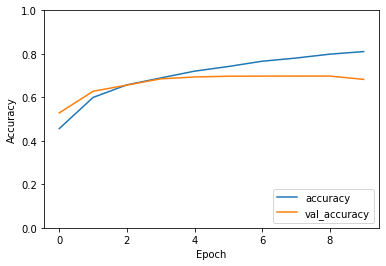

In [5]:
plt.plot(rep.history['accuracy'], label='accuracy')
plt.plot(rep.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

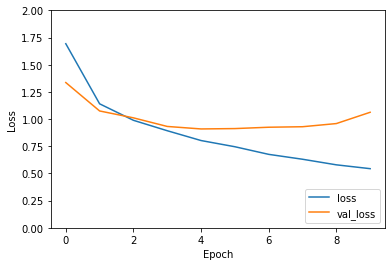

In [6]:
plt.plot(rep.history['loss'], label='loss')
plt.plot(rep.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

313/313 - 1s - loss: 1.0626 - accuracy: 0.6826 - 1s/epoch - 4ms/step
0.6826000213623047


# ***Part 3***

In [8]:
import numpy as np

def global_contrast_normalization(image):
    XX = image

    # replacement for the loop
    X_average = np.mean(XX)
    XX = XX - X_average
    
    ss   = 1.0
    lmda = 10.
    contrast = np.sqrt(lmda + np.mean(XX**2)).astype(np.float64)
    
    if contrast > 1e-8:
        XX = ss * XX / contrast
    else:
        XX = ss * XX 

    return XX

In [9]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)

In [10]:
gcn_train = np.asarray([global_contrast_normalization(x) for x in x_train])
gcn_test = np.asarray([global_contrast_normalization(x) for x in x_test])

In [11]:
gcn_train = (gcn_train - gcn_train.min(axis=(1,2))[:,None,None,:] )/(gcn_train.max(axis=(1,2))-gcn_train.min(axis=(1,2)))[:,None,None,:]
gcn_test = (gcn_test - gcn_test.min(axis=(1,2))[:,None,None,:] )/(gcn_test.max(axis=(1,2))-gcn_test.min(axis=(1,2)))[:,None,None,:]

In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

rep = model.fit(gcn_train, y_train, epochs=10, validation_data=(gcn_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 17s 10ms/step - loss: 1.1991 - accuracy: 0.5719 - val_loss: 0.8828 - val_accuracy: 0.6919
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7237 - accuracy: 0.7476 - val_loss: 0.7781 - val_accuracy: 0.7332
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5920 - accuracy: 0.7937 - val_loss: 0.7365 - val_accuracy: 0.7547
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4960 - accuracy: 0.8275 - val_loss: 0.7501 - val_accuracy: 0.7568
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4228 - accuracy: 0.8519 - val_loss: 0.7803 - val_accuracy: 0.7510
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.3534 - accuracy: 0.8750 - val_loss: 0.8566 - val_accuracy: 0.7441
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.2970 - accuracy: 0.8947 - val_loss: 0.8994 - val_accura

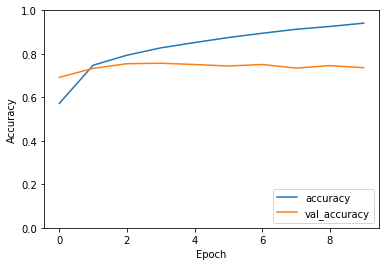

In [13]:
plt.plot(rep.history['accuracy'], label='accuracy')
plt.plot(rep.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

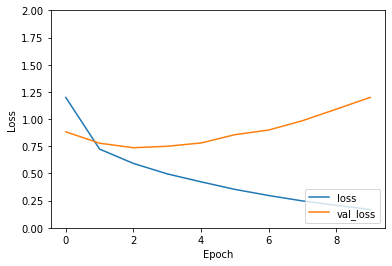

In [14]:
plt.plot(rep.history['loss'], label='loss')
plt.plot(rep.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')

In [16]:
test_loss, test_acc = model.evaluate(gcn_test, y_test, verbose=2)
print(test_acc)

313/313 - 1s - loss: 1.1995 - accuracy: 0.7363 - 1s/epoch - 4ms/step
0.736299991607666


# ***Part 4***

***a)***

In [58]:
model_a = Sequential()
model_a.add(Conv2D(512, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_a.add(MaxPooling2D((4, 4)))
model_a.add(Flatten())
model_a.add(Dense(10, activation='softmax'))
model_a.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 32, 32, 512)       14336     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 8, 8, 512)        0         
 g2D)                                                            
                                                                 
 flatten_41 (Flatten)        (None, 32768)             0         
                                                                 
 dense_76 (Dense)            (None, 10)                327690    
                                                                 
Total params: 342,026
Trainable params: 342,026
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_a.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

rep_a = model_a.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 26s 16ms/step - loss: 1.4578 - accuracy: 0.5042 - val_loss: 1.4556 - val_accuracy: 0.5092
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4169 - accuracy: 0.5179 - val_loss: 1.6259 - val_accuracy: 0.4653
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4078 - accuracy: 0.5183 - val_loss: 1.5652 - val_accuracy: 0.4761
Epoch 4/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.3822 - accuracy: 0.5280 - val_loss: 1.5567 - val_accuracy: 0.5027
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3679 - accuracy: 0.5334 - val_loss: 1.5222 - val_accuracy: 0.4964
Epoch 6/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.3501 - accuracy: 0.5384 - val_loss: 1.4959 - val_accuracy: 0.5272
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3988 - accuracy: 0.5267 - val_loss: 1.6983 - val_accura

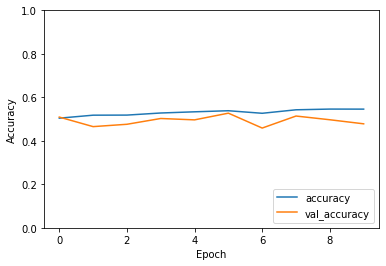

In [61]:
plt.plot(rep_a.history['accuracy'], label='accuracy')
plt.plot(rep_a.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [62]:
test_loss_a, test_acc_a = model_a.evaluate(x_test, y_test, verbose=2)
print(test_acc_a)

313/313 - 2s - loss: 1.7346 - accuracy: 0.4782 - 2s/epoch - 6ms/step
0.4781999886035919


***b)***

In [96]:
model_b = Sequential()
model_b.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_b.add(MaxPooling2D((2, 2)))
model_b.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_b.add(MaxPooling2D((2, 2)))
model_b.add(Conv2D(128, (4, 4), padding='same', activation='relu'))
model_b.add(MaxPooling2D((2, 2)))
model_b.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_b.add(MaxPooling2D((2, 2)))
model_b.add(Flatten())
model_b.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_b.add(Dense(10, activation='softmax'))
model_b.summary()

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_182 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_131 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_183 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_132 (MaxPooli  (None, 8, 8, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_184 (Conv2D)         (None, 8, 8, 128)         131200    
                                                                 
 max_pooling2d_133 (MaxPooli  (None, 4, 4, 128)      

In [97]:
model_b.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

rep_b = model_b.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 21s 13ms/step - loss: 1.6215 - accuracy: 0.4675 - val_loss: 1.2410 - val_accuracy: 0.5633
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1331 - accuracy: 0.6026 - val_loss: 1.0859 - val_accuracy: 0.6188
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.9861 - accuracy: 0.6557 - val_loss: 0.9991 - val_accuracy: 0.6610
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8995 - accuracy: 0.6884 - val_loss: 1.0164 - val_accuracy: 0.6614
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8223 - accuracy: 0.7158 - val_loss: 0.9628 - val_accuracy: 0.6696
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7573 - accuracy: 0.7368 - val_loss: 0.9380 - val_accuracy: 0.6860
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6893 - accuracy: 0.7574 - val_loss: 0.9174 - val_accura

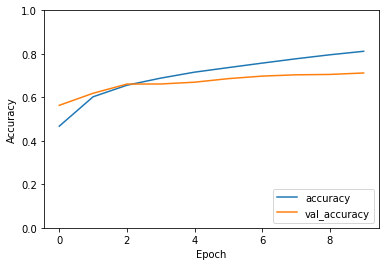

In [98]:
plt.plot(rep_b.history['accuracy'], label='accuracy')
plt.plot(rep_b.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [99]:
test_loss_b, test_acc_b = model_b.evaluate(x_test, y_test, verbose=2)
print(test_acc_b)

313/313 - 2s - loss: 0.9431 - accuracy: 0.7120 - 2s/epoch - 5ms/step
0.7120000123977661
